# LSTM

In [183]:
import os
import glob
import numpy as np
import keras
from keras import *
import tensorflow as tf

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [184]:
def load_data(vfold_ratio=0.2, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join("./", '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

    
        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)


    data = None
    labels = None

    #separate into training and testing 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    
#     print(x_train)
    return x_train, y_train, x_test, y_test, class_names

In [213]:
Xtrain, Ytrain, Xtest, Ytest, class_names = load_data()
num_classes = len(class_names)
image_size = 28

cat


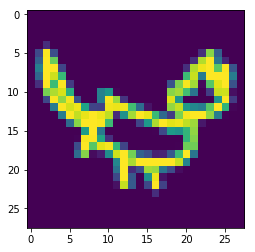

In [186]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(Xtrain))
plt.imshow(Xtrain[idx].reshape(28,28)) 
print(class_names[int(Ytrain[idx].item())])

In [214]:
# Reshape and normalize
x_train = Xtrain.reshape(Xtrain.shape[0], image_size, image_size).astype('float32')
x_test = Xtest.reshape(Xtest.shape[0], image_size, image_size).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(Ytrain, num_classes)
y_test = keras.utils.to_categorical(Ytest, num_classes)

In [173]:
x_train = np.array(Xtrain).reshape((-1, 28, 28))
x_test = np.array(Xtest).reshape((-1, 28, 28))

In [206]:
model = Sequential()
model.add(LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 256)               291840    
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 771       
Total params: 292,611
Trainable params: 292,611
Non-trainable params: 0
_________________________________________________________________
None


In [207]:
model.fit(x_train, y_train,
          batch_size=256,
          epochs=5,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
31s - loss: 0.5229 - acc: 0.7867 - val_loss: 0.2338 - val_acc: 0.9313
Epoch 2/5
31s - loss: 0.2243 - acc: 0.9288 - val_loss: 0.2071 - val_acc: 0.9343
Epoch 3/5
30s - loss: 0.1916 - acc: 0.9398 - val_loss: 0.1839 - val_acc: 0.9413
Epoch 4/5
28s - loss: 0.1764 - acc: 0.9448 - val_loss: 0.1681 - val_acc: 0.9460
Epoch 5/5
27s - loss: 0.1623 - acc: 0.9482 - val_loss: 0.1545 - val_acc: 0.9500


In [209]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.00%


# CNN

In [157]:
def load_data(vfold_ratio=0.2, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join("./data/", '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #separate into training and testing 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    
#     print(x_train)
    return x_train, y_train, x_test, y_test, class_names

In [158]:
x_train, y_train, x_test, y_test, class_names = load_data()
num_classes = len(class_names)
image_size = 28

axe


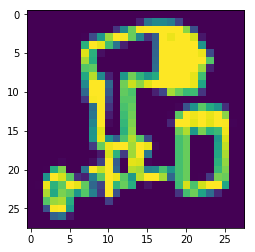

In [28]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [29]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.utils import np_utils
from keras.models import load_model

In [31]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

In [33]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 3003      
Total para

In [34]:
model.fit(x_train, y_train,
          batch_size=256,
          epochs=5,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
12s - loss: 1.0406 - acc: 0.6744 - val_loss: 0.9656 - val_acc: 0.7350
Epoch 2/5
11s - loss: 0.8404 - acc: 0.8069 - val_loss: 0.6683 - val_acc: 0.8747
Epoch 3/5
10s - loss: 0.5173 - acc: 0.8813 - val_loss: 0.4056 - val_acc: 0.8907
Epoch 4/5
12s - loss: 0.3590 - acc: 0.8972 - val_loss: 0.3268 - val_acc: 0.9000
Epoch 5/5
12s - loss: 0.3044 - acc: 0.9108 - val_loss: 0.2834 - val_acc: 0.9123


In [35]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 91.23%
